In [44]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [45]:
#import csv file

df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
#No. of rows and columns

df.shape

(10000, 14)

In [47]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [48]:
df.shape

(10000, 11)

In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


In [52]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [53]:
# Dividing dependent and independent variables

X=df.drop('Exited',axis=1)
y=df['Exited']


In [54]:
# Sampling

from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X_res, y_res = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y_res)))

SMOTE Counter({1: 7963, 0: 7963})


In [55]:
# Splitting a dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [56]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# import modules to create model

from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation,  Dropout
from keras.activations import relu, sigmoid

In [58]:
param_grid= {
    'activation':['sigmoid', 'relu'],
    'layers':[(40, 20), (45, 30, 15), (60,40,25,10),(80,60,40,25,10)],
    'batch_size':[128, 256]
}

In [59]:
#Build Model

def build_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=build_model, verbose=0, activation=['sigmoid', 'relu'], layers = [(40, 20), (45, 30, 15), (60,40,25,10),(80,60,40,25,10)], batch_size = [128, 256])

In [60]:

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5) 

In [61]:
#fit train data
grid_result = grid.fit(X_train, y_train,epochs=40)

/home/asif/Project/Bank-Customer-Churn-Prediction-Model/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/asif/Project/Bank-Customer-Churn-Prediction-Model/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/asif/Project/Bank-Customer-Churn-Prediction-Model/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/asif/Project/Bank-Customer-Churn-Prediction-Model/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/asif/Project/Bank-Customer-Churn-Prediction-Model/venv/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build

In [62]:
grid_result

GridSearchCV(cv=5,
             estimator=KerasClassifier(activation=['sigmoid', 'relu'], batch_size=[128, 256], build_fn=<function build_model at 0x7f3b4a058e00>, layers=[(40, 20), (45, 30, 15), (60, 40, 25, 10), (80, 60, 40, 25, 10)], verbose=0),
             param_grid={'activation': ['sigmoid', 'relu'],
                         'batch_size': [128, 256],
                         'layers': [(40, 20), (45, 30, 15), (60, 40, 25, 10),
                                    (80, 60, 40, 25, 10)]})

In [63]:
[grid_result.best_score_,grid_result.best_params_]

[0.8272760832206238,
 {'activation': 'relu', 'batch_size': 256, 'layers': (80, 60, 40, 25, 10)}]

In [64]:
y_pred=grid.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2036
           1       0.83      0.82      0.82      1946

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



In [66]:
confusion_m=confusion_matrix(y_test,y_pred )
confusion_m

array([[1704,  332],
       [ 359, 1587]])

<Axes: >

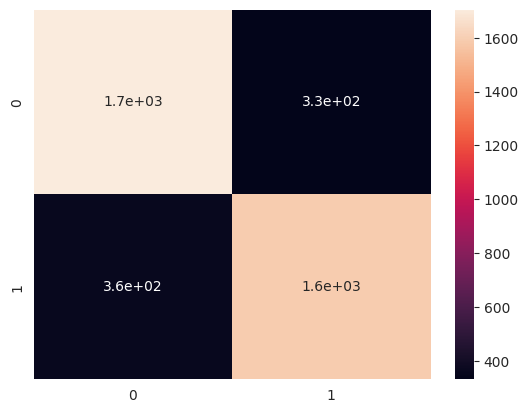

In [67]:
sns.heatmap(confusion_m, annot=True)